# Market Making Strategy
_Version 0.2_

### What Next?

Clearly this is not optimal behavior- our trading is unbounded and we're not doing anything to manage our risk

Other things we can still do in the future
1. __TODO__ fix lot size
1. Mult-day tests
1. Modulate Order Size
1. Monitor P&L during simulation and consider a "stop loss" 

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# load our helper functios
import simtools as st
import marketmaker2 as mm

matplotlib.rcParams[ 'figure.figsize' ] = ( 16, 9 )

### Load TAQ Data

We'll assume we have already done some cleaning by using our Tick Data Setup or similar code

In [2]:
# set up some variables
# NOTE: tickfile is a merged TAQ file!!!
tickfile = '../Data/TSLA-TAQ-aug19v2.zip'
taq = pd.read_pickle( tickfile )

In [3]:
# filter on date
test_day1 = '08/07/19'
test_day2 = '08/12/19'
day1 = taq[ test_day1 ]
day2 = taq[ test_day2 ]

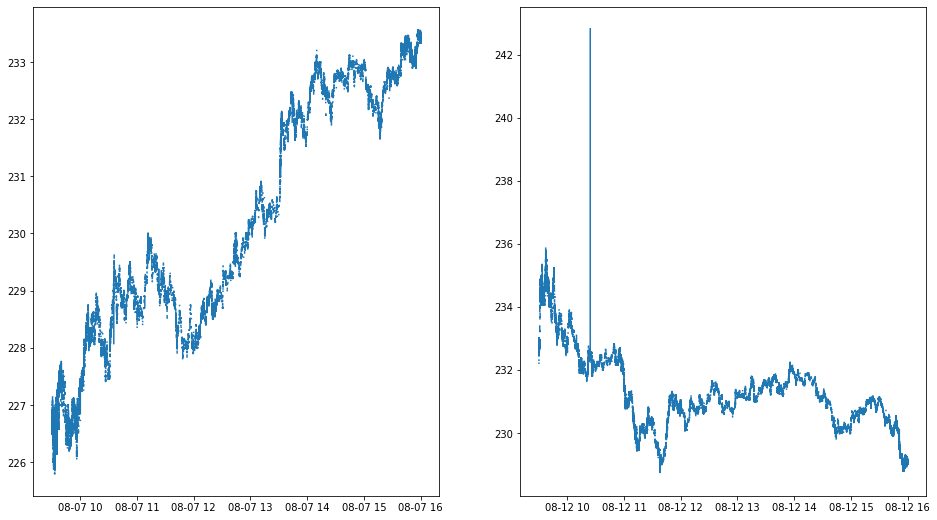

In [4]:
fig, ( plt1, plt2 ) = plt.subplots( 1, 2 )
plt1.plot( day1.trade_px )
plt2.plot( day2.trade_px )
plt.show()

## V2 - tick signal, no risk factor

In [44]:
# without the tick signal...
results = mm.algo_loop(day1, tick_coef=1.0)

2020-03-11 07:27:18:102017: Beginning Market-Making Strategy run
Average stock spread for sample: 4.5576
2020-03-11 07:27:18:313462: tick_coef: 1.00 risk_coef: 0.00 max_position_dollars: 10000
2020-03-11 07:27:18:313462: starting main loop
2020-03-11 07:28:51:843429: end simulation loop
2020-03-11 07:28:51:844426: order analytics
selling to close residual of 22567.0 shares
2020-03-11 07:28:51:969092: Algo run complete.


In [45]:
print("buy count: {} sell count: {}".format(len(results['buys']), len(results['sells'])))

buy count: 521 sell count: 325


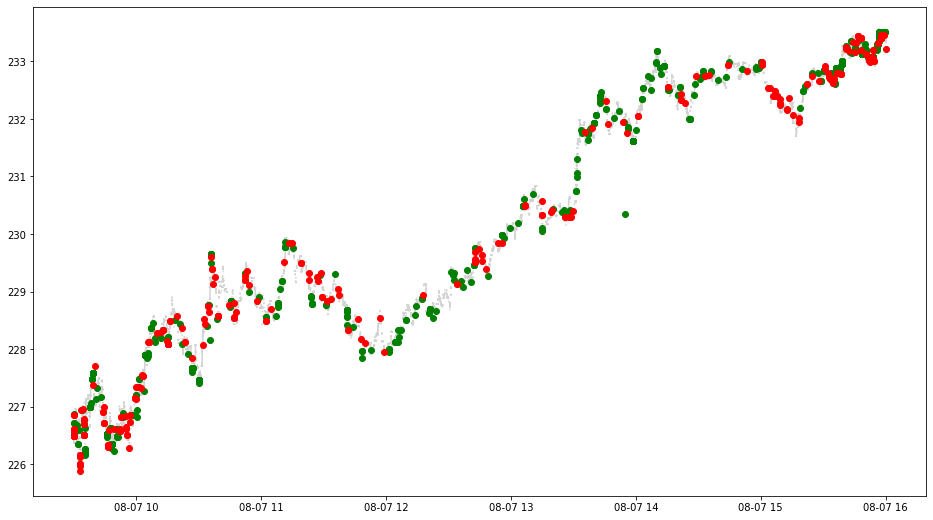

In [46]:
buys = results['buys']
sells = results['sells']
plt.plot(results['midpoints'], color="lightgray")
plt.plot(buys.price, "go")
_ = plt.plot(sells.price, "ro")

#### Performance

Since we are forcing net position to 0, for now we can just calculate a simple difference between avg buy and sell price.  Ideally we need to also calculate intraday P&L, etc. 

In [47]:
# calc P&L
# price * shares / shares

avg_sell = ( sells.price * sells.shares ).sum() / sells.shares.sum()
avg_buy = ( buys.price * buys.shares ).sum() / buys.shares.sum()
PNL = avg_sell - avg_buy
print( "avg P&L per share: {}".format( PNL ) )

avg P&L per share: 0.841702161086431


What about exposure? how much did we end up with on one side or the other?

In [48]:
# sum of buys and sells
net_residual = buys.shares.sum() - sells.shares.sum()
print(net_residual)

0.0


In [49]:
net_pos = results['net_positions'].dropna() * results['midpoints'].mean()

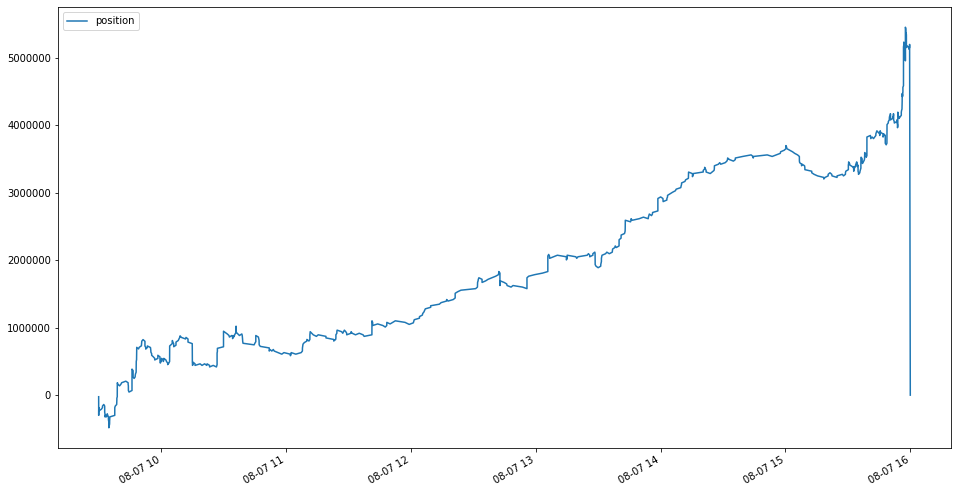

In [50]:
net_pos.plot()

## V3 with risk factor 

In [51]:
# without the tick signal...
results = mm.algo_loop(day1, tick_coef=1.0, risk_coef=1.0, max_position_dollars=1000000)

2020-03-11 07:28:52:835788: Beginning Market-Making Strategy run
Average stock spread for sample: 4.5576
2020-03-11 07:28:53:046731: tick_coef: 1.00 risk_coef: 1.00 max_position_dollars: 1000000
2020-03-11 07:28:53:047729: starting main loop
2020-03-11 07:30:26:463013: end simulation loop
2020-03-11 07:30:26:464010: order analytics
selling to close residual of 35.0 shares
2020-03-11 07:30:26:594661: Algo run complete.


In [52]:
print("buy count: {} sell count: {}".format(len(results['buys']), len(results['sells'])))

buy count: 388 sell count: 399


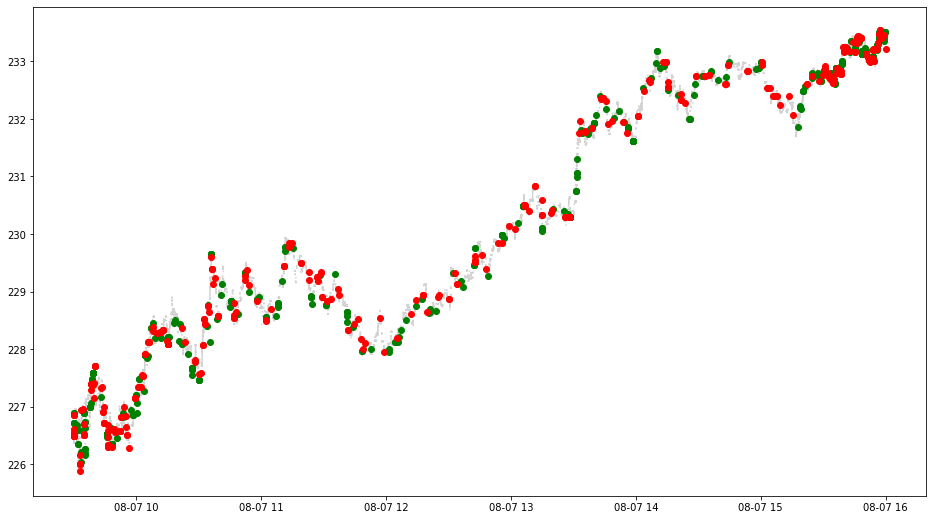

In [53]:
buys = results['buys']
sells = results['sells']
plt.plot(results['midpoints'], color="lightgray")
plt.plot(buys.price, "go")
plt.plot(sells.price, "ro")

#### Performance

Since we are forcing net position to 0, for now we can just calculate a simple difference between avg buy and sell price.  Ideally we need to also calculate intraday P&L, etc. 

In [54]:
# calc P&L
# price * shares / shares

avg_sell = ( sells.price * sells.shares ).sum() / sells.shares.sum()
avg_buy = ( buys.price * buys.shares ).sum() / buys.shares.sum()
PNL = avg_sell - avg_buy
print( "avg P&L per share: {}".format( PNL ) )

avg P&L per share: 0.0639227395726607


What about exposure? how much did we end up with on one side or the other?

In [55]:
# sum of buys and sells
net_residual = buys.shares.sum() - sells.shares.sum()
print(net_residual)

0.0


In [56]:
# lot net_positions

In [57]:
net_pos = results['net_positions'].dropna() * results['midpoints'].mean()

In [58]:
results.keys()

dict_keys(['midpoints', 'fair_values', 'tick_factors', 'buys', 'sells', 'quote_count', 'net_positions', 'residual_position', 'risk_factors'])

In [59]:
rf = results['risk_factors']

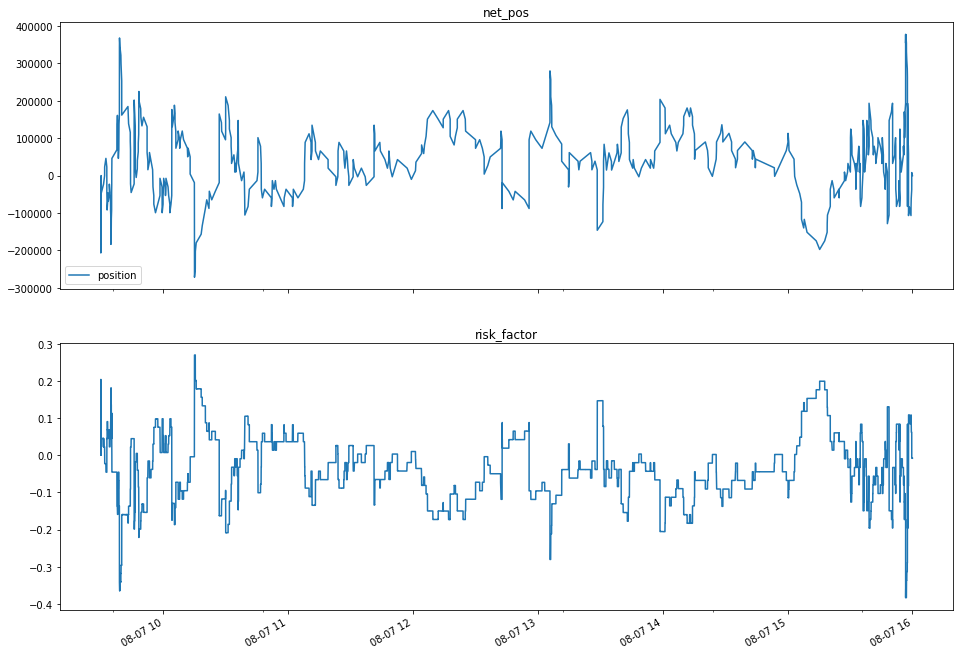

In [60]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,12), sharex=True)
net_pos.plot(ax=ax1, title='net_pos')
rf.plot(ax=ax2, title='risk_factor')
plt.show()

In [61]:
buys.shares.mean()

110.48453608247422

In [62]:
sells.shares.mean()

107.43859649122807